# Visualisation of 1D model output

**Date:** 2025-12-01

**Authors:** Damien Bouffard

**Summary:** This notebook provides tools to download, load, save and visualise 1D lake model output (Simstrat-like `T_out.dat`).

## Content:

This notebook helps you create visualizations of lake temperatures. You can:

1. **Download and save 1D model output** Using the API system of Alplakes
2. **Plot time series** showing how temperature changes over time at a specific location
3. **Plot temeperature heatmap** plot temperature heatmap (depth vs time)
4. **evaluate climatology** showing how the cross-section changes over time

## Available Functions:

- `df = load_lake_data(model='simstrat',lake='aegeri',...)`- load online or local model output, save the dataset.
- `plot_temperature_heatmap(df, years=None, ...)` — plot temperature heatmap (depth vs time).
- `plot_temperature_at_depth(df, depth, ...)` — extract and plot a time series at the nearest available depth (with aggregation options).
- `plot_temperature_climatology(df, depth, ...)` — compute and plot daily-of-year climatology (mean, std, min, max) with optional baseline-year overlay.
- `compare_heatmaps(path1, path2, ...)` — load two site outputs and plot their difference heatmap (restricted to shallowest system).
- `plot_two_sites_at_depth(path1, path2, depth, ...)` — extract and plot aligned time series from two sites at a given depth.


## Before You Start:

**No Python knowledge needed!** Just follow these steps:
1. Run each cell in order (click the ▶️ button or press Shift+Enter)
2. Change the values in the examples to customize your visualizations
3. Look for the sections marked "👉 CUSTOMIZE HERE" to modify parameters

**Remaining tasks:** 
- add functions to a python scripts DONE
- save figures and data
- comment the codes for beginners (as in 3D_xxx)



---

## STEP 1: Import Required Libraries
## ESSENTIAL STEP


In [41]:
# import necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timezone, timedelta
import json
import requests

from functions_1D import plot_temperature_heatmap, plot_temperature_at_depth, plot_temperature_climatology, compare_heatmaps, plot_two_sites_at_depth
from functions_1D import  generate_path_API_1D, read_API_1D_to_dataframe, fetch_API_1D_chunked, load_lake_data

# Step 2
## Loading data (locally on online)

In [32]:
df = load_lake_data(
    model='simstrat',           
    lake='murten',              # 👉 change lake (check used name on Alplakes)
    start='198101010000',       # 👉 start of model output YYYYMMDDHHMMSS String, 12 digits
    stop='202512010000',        # 👉 end of model output YYYYMMDDHHMMSS String, 12 digits 
    variables="T",
    #local_path='../data/Aegeri/aegeri.csv',  # 👉 if use of local data, indicate the path and the name here
    file_priority='csv',
    #save_csv='../data/Aegeri/aegeri.csv',    # 👉 to save the file locally, remove '#' and indicate the path and name of saved file. Directory created automatically if not present  ✓
    chunk_months=12,
    force_download=False        # 👉 to force a new online download of the data (True/False)
)


No local path specified - downloading from API...
Fetching data from 1981-01-01 00:00:00 to 2025-12-01 00:00:00 in 12-month chunks...
  Chunk 1: 1981-01-01 to 1982-01-01... ✓ (2920 rows)
  Chunk 2: 1982-01-01 to 1983-01-01... ✓ (2920 rows)
  Chunk 2: 1982-01-01 to 1983-01-01... ✓ (2920 rows)
  Chunk 3: 1983-01-01 to 1984-01-01... ✓ (2920 rows)
  Chunk 3: 1983-01-01 to 1984-01-01... ✓ (2920 rows)
  Chunk 4: 1984-01-01 to 1985-01-01... ✓ (2920 rows)
  Chunk 4: 1984-01-01 to 1985-01-01... ✓ (2928 rows)
  Chunk 5: 1985-01-01 to 1986-01-01... ✓ (2928 rows)
  Chunk 5: 1985-01-01 to 1986-01-01... ✓ (2920 rows)
  Chunk 6: 1986-01-01 to 1987-01-01... ✓ (2920 rows)
  Chunk 6: 1986-01-01 to 1987-01-01... ✓ (2920 rows)
  Chunk 7: 1987-01-01 to 1988-01-01... ✓ (2920 rows)
  Chunk 7: 1987-01-01 to 1988-01-01... ✓ (2920 rows)
  Chunk 8: 1988-01-01 to 1989-01-01... ✓ (2920 rows)
  Chunk 8: 1988-01-01 to 1989-01-01... ✓ (2928 rows)
  Chunk 9: 1989-01-01 to 1990-01-01... ✓ (2928 rows)
  Chunk 9: 1989-01

In [ ]:
## deprecated

# Load data
#path = 'data/Geneva'
# Adjust the path - use the correct relative path from your notebook location
#data_path = os.path.join(os.path.dirname(os.getcwd()), path, 'T_out.dat')

#df = pd.read_csv(data_path)
#df['Datetime'] = pd.Timestamp('1981-01-01') + pd.to_timedelta(df['Datetime'], unit='D')
#df.head()

# Example usage
#df_api = fetch_API_1D_chunked(
#    model='simstrat',
#    lake='geneva',
#    start='198101010000',
#    stop='199206072300',
#    save_csv='../data/Geneva/output.csv'
#)
#print(df_api)


# Step 2
## data visualisation 

### Heatmap

<Axes: title={'center': 'Temperature  (All data)'}, xlabel='Date', ylabel='Depth (m)'>

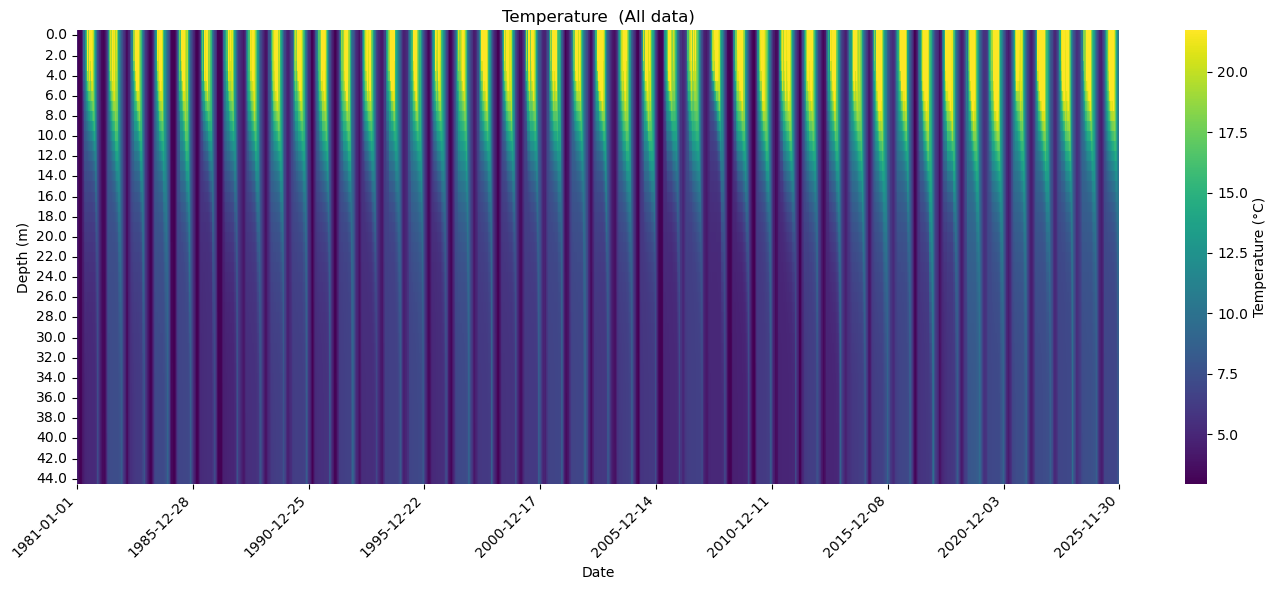

In [ ]:
plot_temperature_heatmap(
    df, 
    years=None,         # 👉 change time range years = (2010,2020) or years = 2024
    cmap='viridis',     # 👉 change colormap 'turbo', 'virdis', 'thermal etc see https://matplotlib.org/stable/users/explain/colors/colormaps.html 
    vmin=None,          # 👉 adapt lower boundary  vmin = None or vmin = 0
    vmax=None,          # 👉 adapt upper boundary  vmax = None or vmax = 25
    figsize=(14,6),     # 👉 adapt figure size (in inches 1in = 2.54cm)
    n_xticks=10,        # 👉 max number of x ticks to show
    savepath='../figures/heatmap_murten.png'       # 👉 option to save the figure (None or '..data/figures/')
    )    
#Examples.
#  plot_temperature_heatmap(df)
#  plot_temperature_heatmap(df, years=2024)
#  plot_temperature_heatmap(df, years=2024) 
# plot_temperature_heatmap(df, years=(2010,2020))  



### Time serie at one depth

<Axes: title={'center': 'Temperature at depth ~0.0 m'}, xlabel='Date', ylabel='Temperature (°C)'>

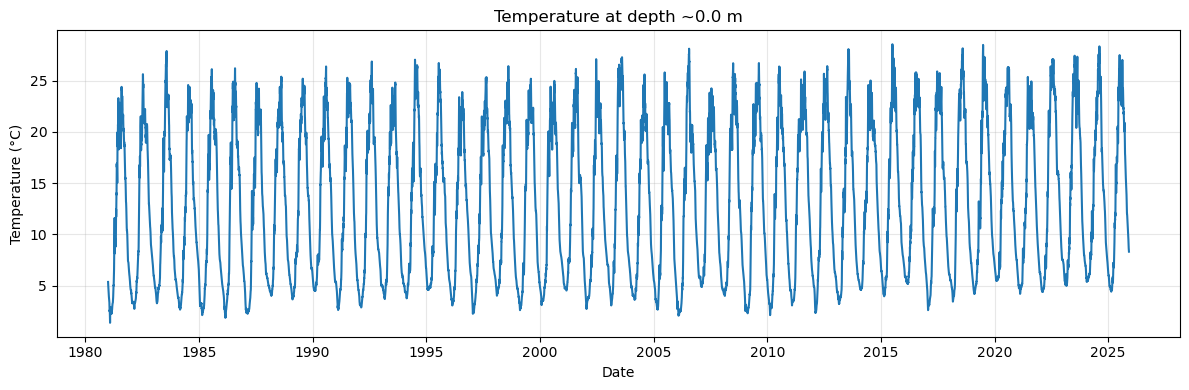

In [ ]:
# plot_temperature_at_depth(df, depth=1.0, agg='daily')  # 👉 select depth, # 👉 change averaging , 'daily', 'monthly' ,'yearly'  or none (then remove)
plot_temperature_at_depth(
    df,
    depth = 0,        # 👉 change depth depth = 0 (positive values)
    agg = 'daily',    # 👉 change temporal aggregation, agg = 'daily', 'monthly' ,'yearly'  on none
    method = 'mean',  # 👉 change aggregation method "mean" or "median"
    figsize = (12,4), # 👉 adapt figure size (in inches 1in = 2.54cm)
    savepath = None   # 👉 option to save the figure (None or '..data/figures/temperature_Xm_murten.png')
    )


#plot_temperature_at_depth(df, depth=0)  

### Climatology figure at a given depth

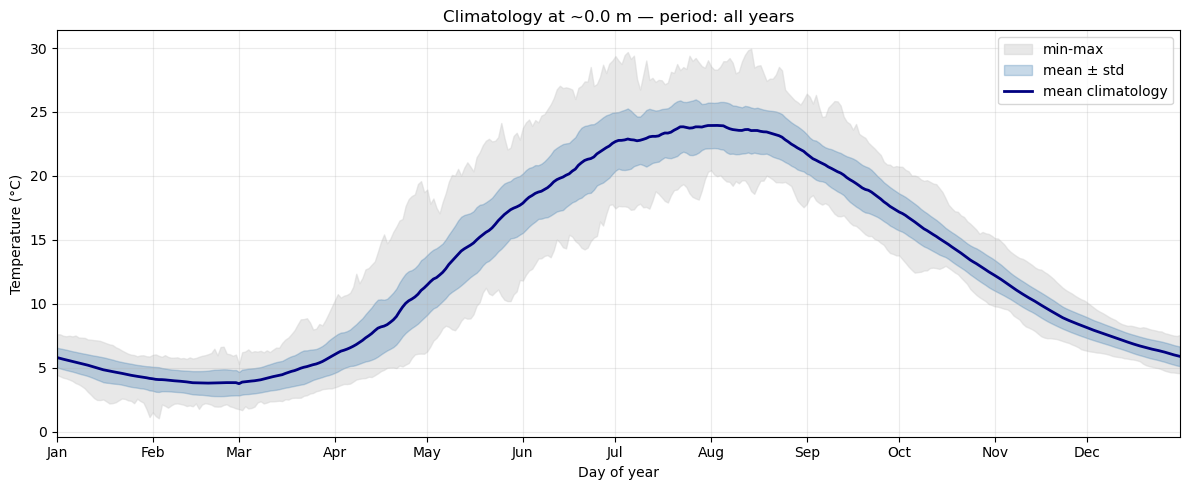

In [ ]:
ax, clim = plot_temperature_climatology(
    df, 
    depth = 0,               # 👉 change depth depth = 0 (positive values)   
    period=None,             # 👉 change time range years = (2010,2020) or None
    baseline_year=None,      # 👉 Assign a reference year baseline_year = 2013 or None
    method='mean',           # 👉 Aggregation method 'mean' or 'median'
    figsize=(12,5),          # 👉 adapt figure size (in inches 1in = 2.54cm)
    savepath=None            # 👉 option to save the figure (None or '..data/figures/climatology_murten.png')
    )



### Difference between two simulations plotted as heatmap

Comparison is restricted vertically to the maximum depth of the shallower system (by magnitude).

Only overlapping depths and times are used to compute the difference to avoid large NaN areas.

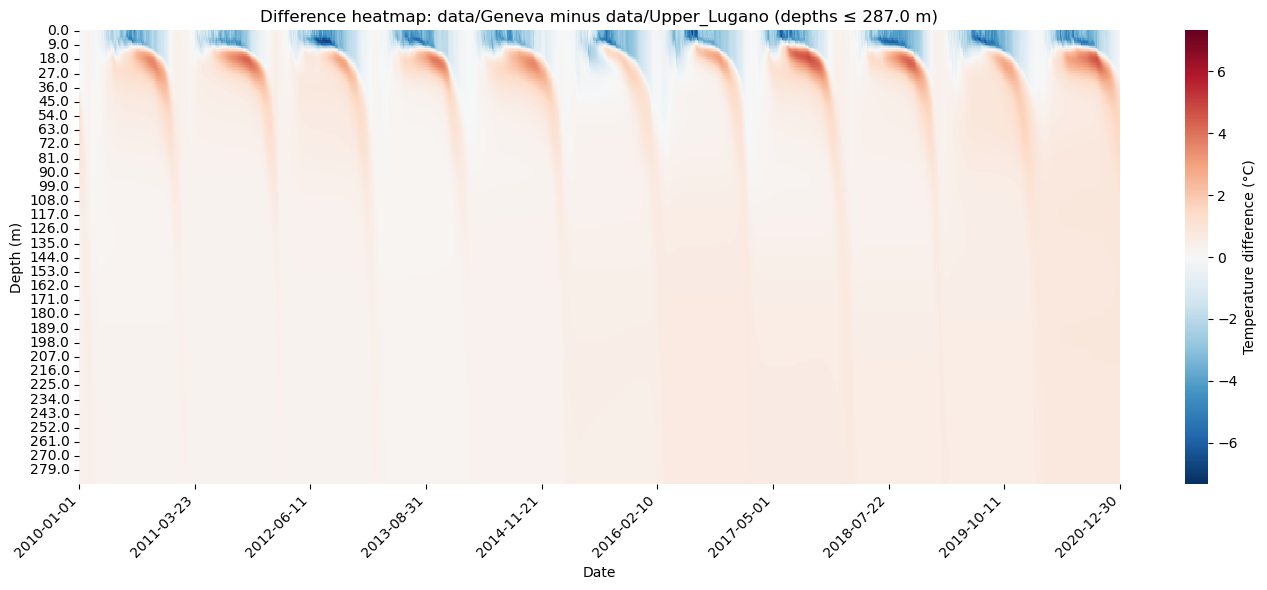

In [ ]:
(ax, f) = compare_heatmaps(
    'data/Geneva',           # 👉  path for first model output -- there should be a file T_out.dat in this folder         
    'data/Upper_Lugano',     # 👉  path for second model output -- there should be a file T_out.dat in this folder
    years=(2010, 2020),      # 👉 change time range years = (2010,2020) 
    cmap='RdBu_r',           # 👉 change colormap 'turbo', 'virdis', 'thermal etc see https://matplotlib.org/stable/users/explain/colors/colormaps.html 
    figsize=(14,6),          # 👉 adapt figure size (in inches 1in = 2.54cm)
    n_xticks=10,             # 👉 max number of x ticks to show
    savepath=None            # 👉 option to save the figure (None or '..data/figures/comparison_lakeX_lakeY.png')
)    



### Difference between two simulations at a specific depth

Only overlapping depths and times are used to compute the difference to avoid large NaN areas.

/Users/bouffada/Documents/Git/Peak_alplakes/scripts/functions_1D.py:924: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s1 = s1.resample(freq).mean()
/Users/bouffada/Documents/Git/Peak_alplakes/scripts/functions_1D.py:925: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s2 = s2.resample(freq).mean()


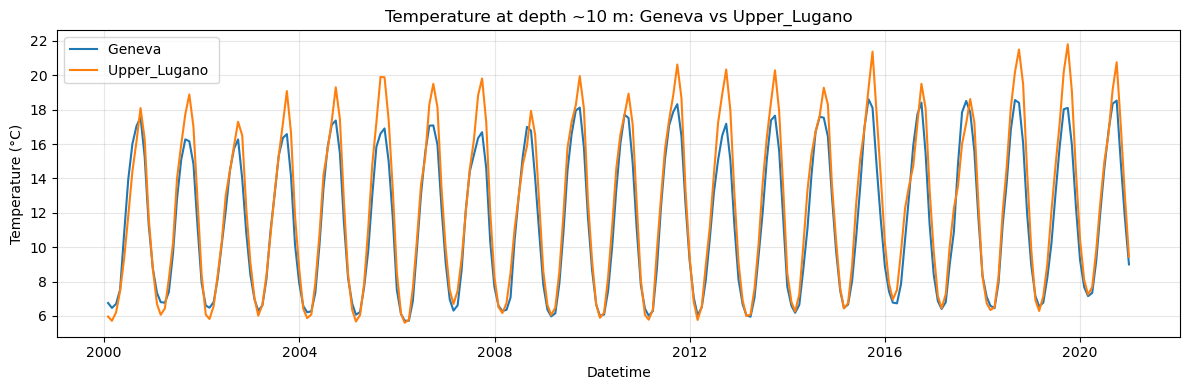

In [48]:
# Example usage:
ax, df = plot_two_sites_at_depth(
    'data/Geneva',              # 👉  path for first model output -- there should be a file T_out.dat in this folder
    'data/Upper_Lugano',        # 👉  path for second model output -- there should be a file T_out.dat in this folder
    depth=10,                   # 👉 change depth of investigation 
    years=(2000,2020),          # 👉 change time range years = (2010,2020) 
    agg='monthly',              # 👉 change temporal aggregation, agg = 'daily', 'monthly' ,'yearly'  on none
    savepath='figures/compare_10m.png' # 👉 option to save the figure (None or '..data/figures/comparison_lakeX_lakeY_Zm.png')
)